In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the files
results_data_file = pd.read_csv(r"..\cleaned_data\f1db-races-race-results-CLEANED.csv")
quals_data_file = pd.read_csv(r"..\cleaned_data\f1db-races-qualifying-results-CLEANED.csv")

# Create list of unique race ids
race_id_list = results_data_file['raceId'].unique()

In [4]:
# Get average local position change for each race id

avg_local_pos = []

for race_id in race_id_list:
    race_data = results_data_file[results_data_file['raceId'] == race_id]
    position_data = race_data[race_data['positionNumber']>0]
    prefinal_data = []
    final_data = []
    for x in position_data['positionNumber']:
        prefinal_data.append(x)
        final_data.append(x)

    m = len(prefinal_data)
    race_position_cutoff = m+1

    for x in range(m):
        if x+1 not in prefinal_data: 
            race_position_cutoff = x
            break
    
    for y in range(m):
        num = prefinal_data[y]
        if num >= race_position_cutoff:
            final_data.pop(final_data.index(num))
    
    n = len(final_data)
    sum = 0

    for i in range(n):
        summand = 0
        for j in range(n):
            if j == i: continue
            summand += (i-j) - (final_data.index(i+1)-final_data.index(j+1))
        sum += abs(summand)

    sum = sum/(n * (n-1))
    avg_local_pos.append(sum)

print(avg_local_pos)
print(avg_local_pos[488])
print(max(avg_local_pos))

[2.4444444444444446, 0.5714285714285714, 1.5, 1.4545454545454546, 3.272727272727273, 1.0909090909090908, 1.3333333333333333, 1.6, 1.25, 3.090909090909091, 1.3333333333333333, 3.6, 1.4, 1.5, 3.3333333333333335, 2.6666666666666665, 1.4545454545454546, 2.1666666666666665, 0.2222222222222222, 1.6666666666666667, 1.8181818181818181, 1.0, 1.25, 1.6, 2.0, 1.5, 2.4, 2.6153846153846154, 4.4, 1.25, 3.142857142857143, 2.25, 0.75, 2.588235294117647, 0.6666666666666666, 2.533333333333333, 2.4615384615384617, 0.75, 0.8571428571428571, 3.111111111111111, 2.888888888888889, 1.5, 0.6666666666666666, 2.0, 1.0909090909090908, 1.5, 2.25, 0.8, 3.230769230769231, 1.8181818181818181, 3.4285714285714284, 2.7142857142857144, 2.75, 2.2857142857142856, 3.6666666666666665, 1.6363636363636365, 1.0909090909090908, 3.6666666666666665, 1.4666666666666666, 1.2, 3.3846153846153846, 1.3333333333333333, 1.5555555555555556, 2.2857142857142856, 1.6923076923076923, 2.923076923076923, 1.3333333333333333, 0.6666666666666666, 

In [5]:
# Compute the difference between Fastest Qualifying Time grid and the Starting Grid

time_data = quals_data_file[quals_data_file['q1Millis']>0] # get the races which have the qualifying data we need
new_race_id_list = time_data['raceId'].unique()

qs_difference = [] # here 'qs difference' stands for 'Qualifying-Starting difference' 

for race_id in new_race_id_list:
    qual_data = quals_data_file[quals_data_file['raceId'] == race_id]
    driver_number_data = list(qual_data['driverNumber'])
    q1_time_data = list(qual_data['q1Millis'])
    q2_time_data = list(qual_data['q2Millis'])
    q3_time_data = list(qual_data['q3Millis'])

    min_qual_time_data = {}
    min_qual_time_list = []
    num_of_drivers = len(q1_time_data)
    for x in range(num_of_drivers):
        min_qual_time = min(q1_time_data[x],q2_time_data[x],q3_time_data[x])
        min_qual_time_data[x] = min_qual_time
        min_qual_time_list.append(min_qual_time)

    fastest_qual_time_positions = sorted(min_qual_time_list)
    position_difference = 0

    for y in range(num_of_drivers):
        if fastest_qual_time_positions[y] != min_qual_time_data[y]:
            driver_difference = abs(y - min_qual_time_list.index(fastest_qual_time_positions[y]))
            position_difference += driver_difference
    
    qs_difference.append(position_difference)

print(max(qs_difference))

98


In [6]:
# Get average local position change for race ids to match qs difference data

qs_avg_local_pos = []

for race_id in new_race_id_list:
    race_data = results_data_file[results_data_file['raceId'] == race_id]
    position_data = race_data[race_data['positionNumber']>0]
    prefinal_data = []
    final_data = []
    for x in position_data['positionNumber']:
        prefinal_data.append(x)
        final_data.append(x)

    m = len(prefinal_data)
    race_position_cutoff = m+1

    for x in range(m):
        if x+1 not in prefinal_data: 
            race_position_cutoff = x
            break
    
    for y in range(m):
        num = prefinal_data[y]
        if num >= race_position_cutoff:
            final_data.pop(final_data.index(num))
    
    n = len(final_data)
    sum = 0

    for i in range(n):
        summand = 0
        for j in range(n):
            if j == i: continue
            summand += (i-j) - (final_data.index(i+1)-final_data.index(j+1))
        sum += abs(summand)

    sum = sum/(n * (n-1))
    qs_avg_local_pos.append(sum)

print(avg_local_pos)
print(max(avg_local_pos))

[2.4444444444444446, 0.5714285714285714, 1.5, 1.4545454545454546, 3.272727272727273, 1.0909090909090908, 1.3333333333333333, 1.6, 1.25, 3.090909090909091, 1.3333333333333333, 3.6, 1.4, 1.5, 3.3333333333333335, 2.6666666666666665, 1.4545454545454546, 2.1666666666666665, 0.2222222222222222, 1.6666666666666667, 1.8181818181818181, 1.0, 1.25, 1.6, 2.0, 1.5, 2.4, 2.6153846153846154, 4.4, 1.25, 3.142857142857143, 2.25, 0.75, 2.588235294117647, 0.6666666666666666, 2.533333333333333, 2.4615384615384617, 0.75, 0.8571428571428571, 3.111111111111111, 2.888888888888889, 1.5, 0.6666666666666666, 2.0, 1.0909090909090908, 1.5, 2.25, 0.8, 3.230769230769231, 1.8181818181818181, 3.4285714285714284, 2.7142857142857144, 2.75, 2.2857142857142856, 3.6666666666666665, 1.6363636363636365, 1.0909090909090908, 3.6666666666666665, 1.4666666666666666, 1.2, 3.3846153846153846, 1.3333333333333333, 1.5555555555555556, 2.2857142857142856, 1.6923076923076923, 2.923076923076923, 1.3333333333333333, 0.6666666666666666, 

In [7]:
avg_local_pos_data = pd.DataFrame({
    "average_local_position": avg_local_pos,
    "raceId": race_id_list
})

avg_local_pos_data.to_csv("Average Local Positions.csv", index=False)

In [8]:
qs_difference_data = pd.DataFrame({
    "average_local_position": qs_avg_local_pos,
    "qualifying_starting_difference": qs_difference
})

qs_difference_data.to_csv("Qualifying Starting Position Difference.csv", index=False)

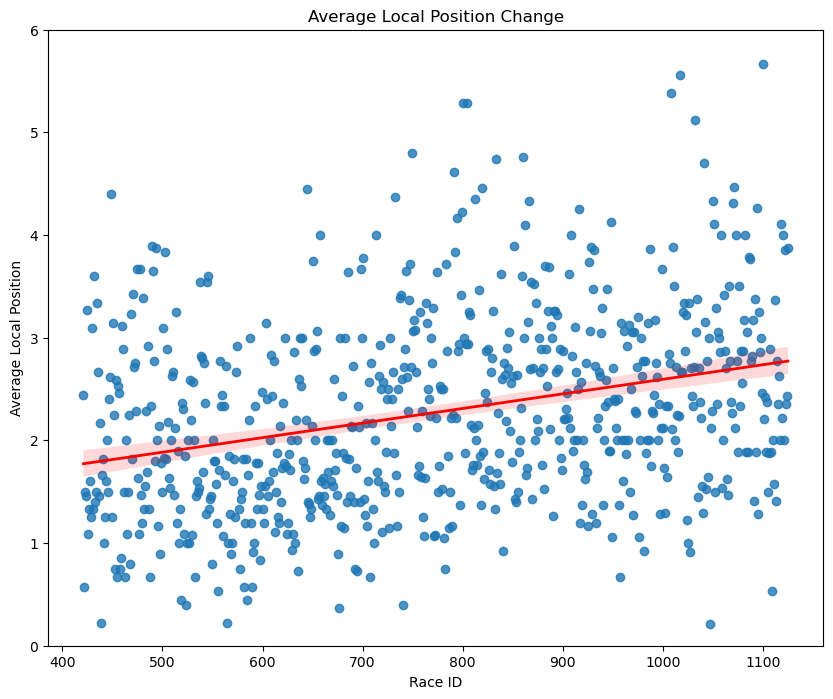

In [9]:
# Plot Average Local Position Change vs. Race ID

plt.rcParams["figure.figsize"] = (10,8)
sns.regplot(data = avg_local_pos_data,
                x = "raceId",
                y = "average_local_position",
                line_kws= {'color':'red', "linewidth" : 2},
                order = 1)
plt.ylim(0,6)
#plt.axvline(x = 955, color = 'black')
plt.title("Average Local Position Change")
plt.xlabel("Race ID")
plt.ylabel("Average Local Position")
plt.savefig("Average Local Position Change.png")

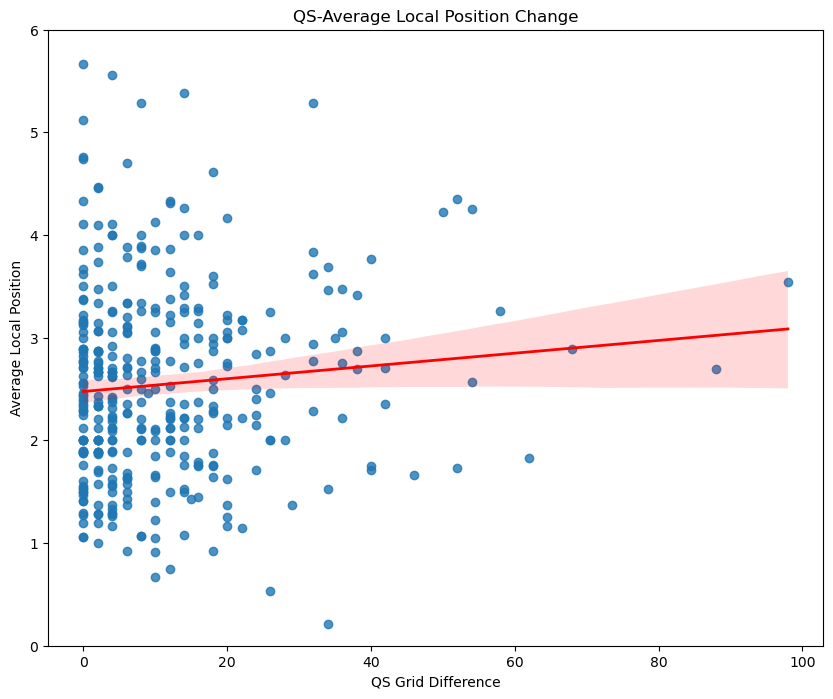

In [10]:
# Plot Average Local Position Change vs. QS Grid Difference

plt.rcParams["figure.figsize"] = (10,8)
sns.regplot(data = qs_difference_data,
                x = "qualifying_starting_difference",
                y = "average_local_position",
                line_kws= {'color':'red', "linewidth" : 2},
                order = 1)
plt.ylim(0,6)
#plt.axvline(x = 955, color = 'black')
plt.title("QS-Average Local Position Change")
plt.xlabel("QS Grid Difference")
plt.ylabel("Average Local Position")
plt.savefig("QS-Average Local Position Change.png")